In [9]:
import pandas as pd
# import the dataset from Sklearn
from sklearn.datasets import load_breast_cancer


# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)


# Add a target column, and fill it with the target data
#df['target'] = data.target
# Show the first five rows
print(df)






{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [76]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  1 15:07:37 2022

@author: Arpan
"""
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up the data for modelling 
# define Y 
y=df['target'].to_frame() 
# define X df.columns.difference removes the specified column
X=df[df.columns.difference(['target'])] 
 # create train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# build model - Xgboost
# build classifier
xgb_mod=xgb.XGBClassifier(random_state=101, gpu_id=0, use_label_encoder = False)
#values.ravel() compresses any array to 1D Array 
#print(y_train.values.ravel())
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel())   

print(xgb_mod)


# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

print(y_test)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print((y_pred))


# Performance
#Actual Prediction Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

     area error  compactness error  ...  worst symmetry  worst texture
476       31.01            0.03288  ...          0.2534          27.26
130       15.24            0.02456  ...          0.3469          17.81
246       13.56            0.01569  ...          0.2767          27.82
205       26.44            0.01919  ...          0.3415          20.24
16        45.40            0.01162  ...          0.3029          30.88
..          ...                ...  ...             ...            ...
552       18.76            0.01233  ...          0.2407          36.00
393       80.99            0.03726  ...          0.3828          28.74
75        79.25            0.02203  ...          0.2650          24.56
337       88.25            0.03897  ...          0.3679          34.37
523       26.45            0.02251  ...          0.2849          25.63

[455 rows x 30 columns]
     area error  compactness error  ...  worst symmetry  worst texture
107       9.227            0.01047  ...          0.2

[[-1.1151983   0.33704114 -0.15231776 ... -0.44538927 -0.3930892
   1.8217278 ]
 [-1.5067407  -0.36867443 -0.15231776 ...  0.20130691  0.15741926
  -0.10276321]
 [-1.0922414   0.4280302  -0.15231776 ... -0.48328686 -0.394915
  -0.2449534 ]
 ...
 [-1.2154399   0.47104546 -0.14599684 ...  0.22673917  0.581024
  -1.0303084 ]
 [-0.9944351   0.4280302  -0.15057111 ... -0.46644038 -0.40283415
  -0.8116227 ]
 [ 1.091399   -0.6470137   0.12604903 ...  0.48405433 -0.1732263
  -0.5482911 ]]


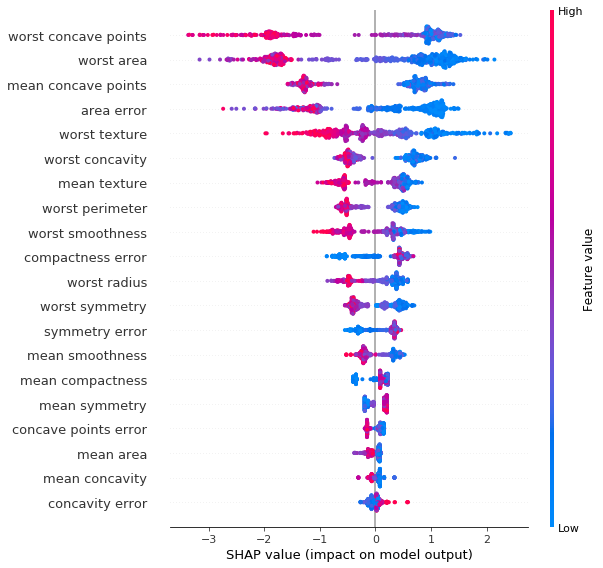

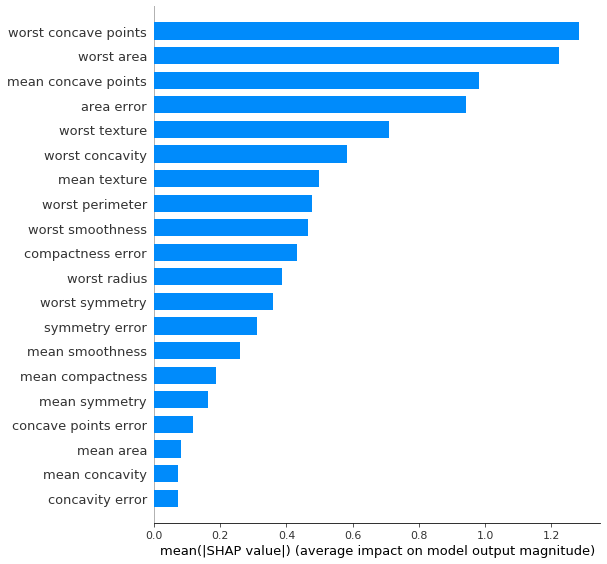

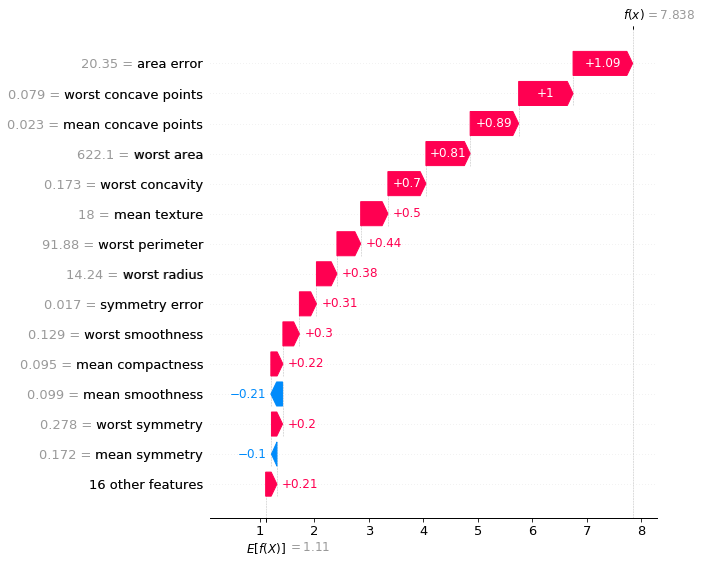

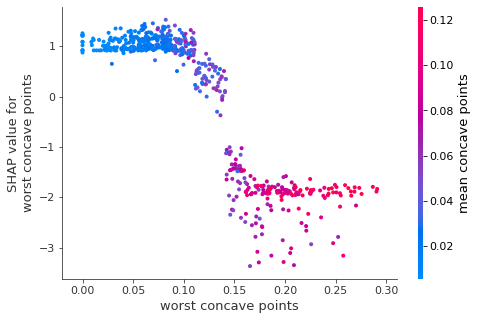

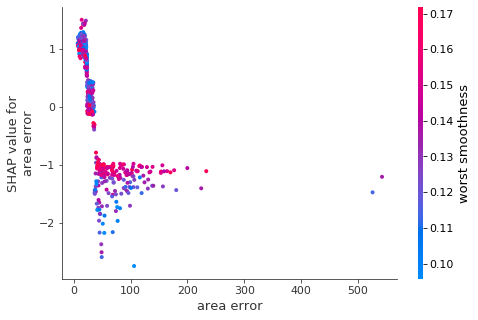

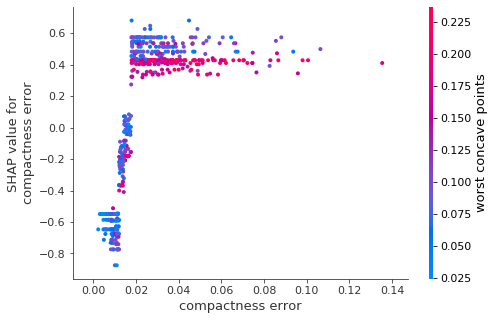

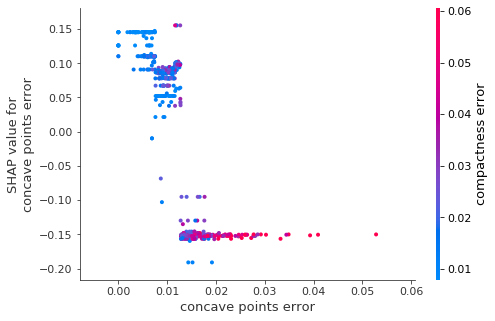

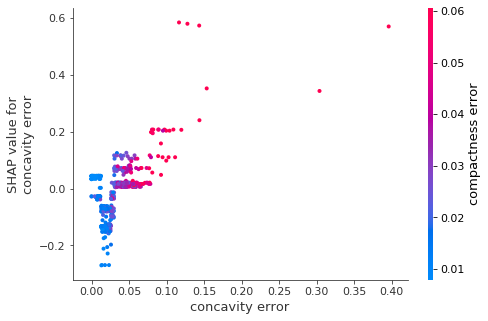

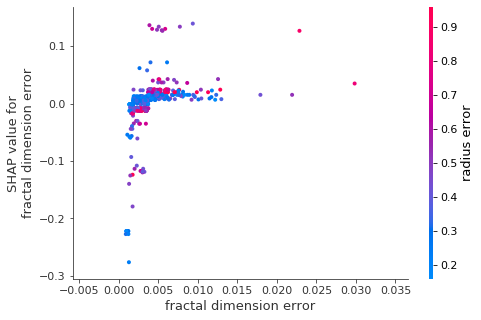

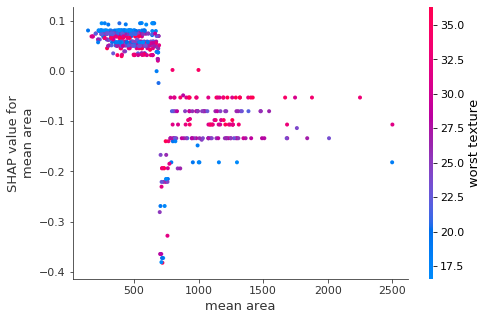

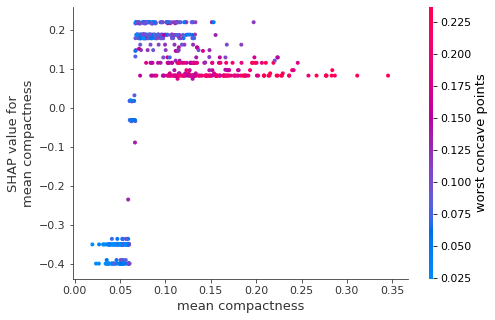

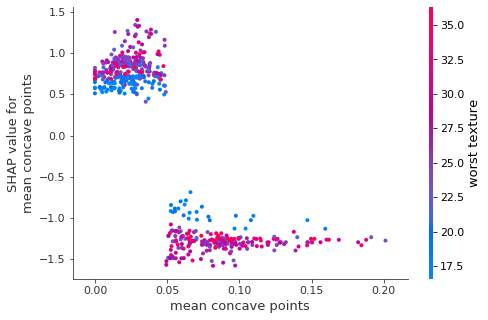

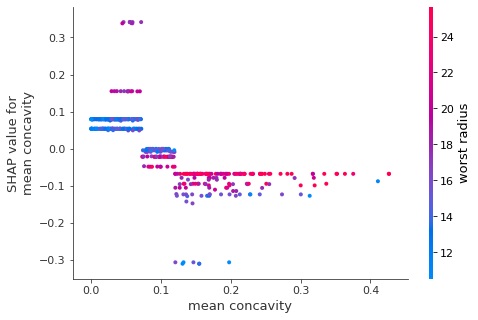

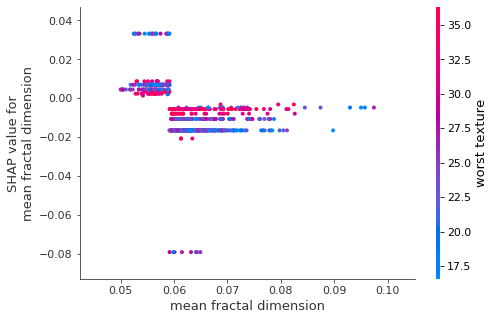

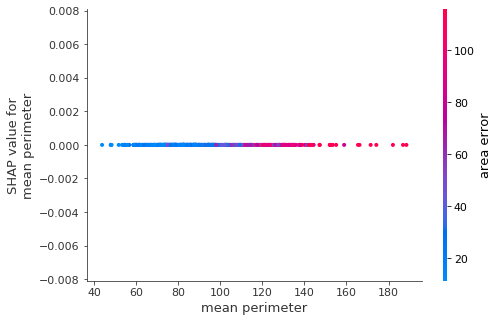

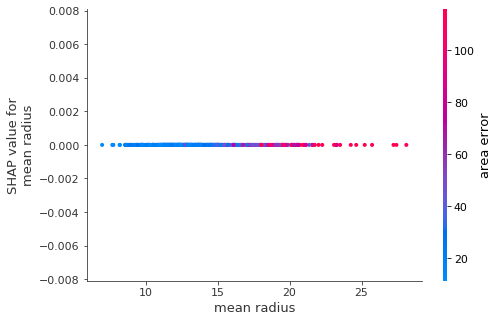

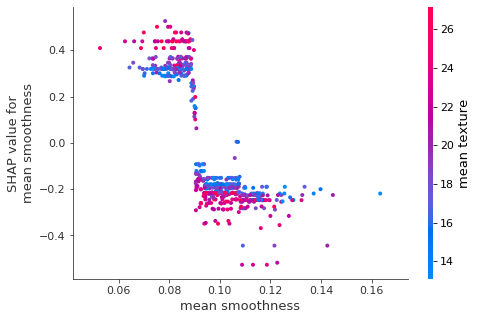

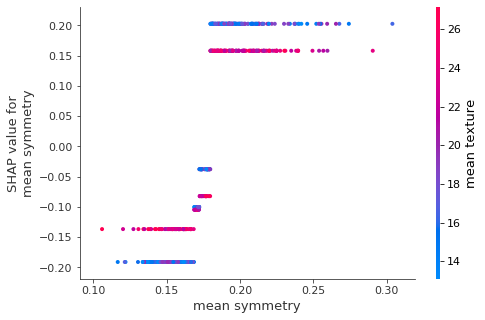

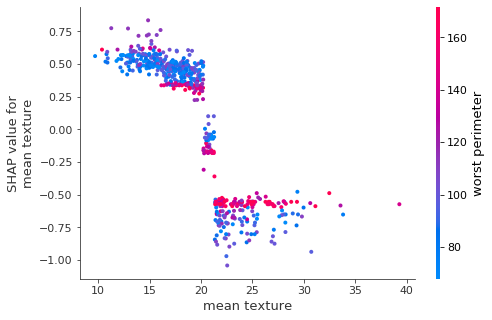

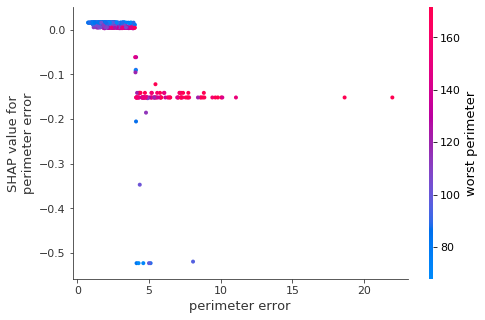

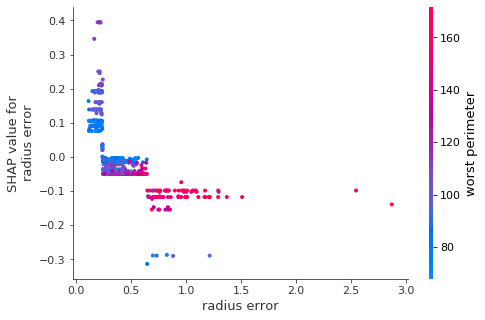

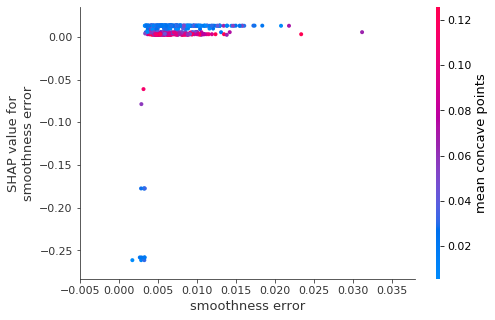

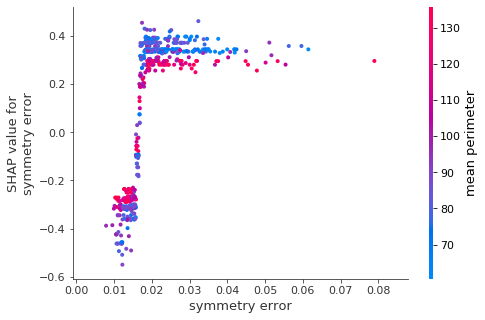

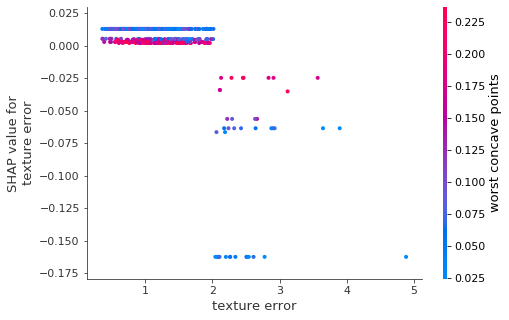

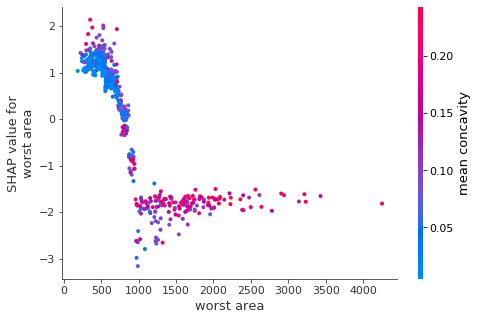

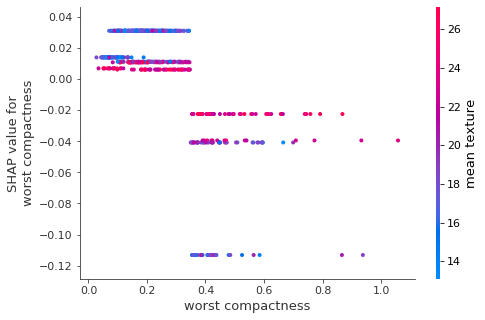

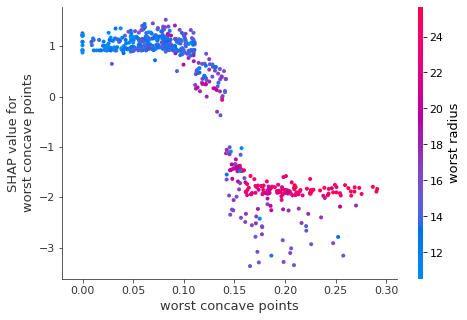

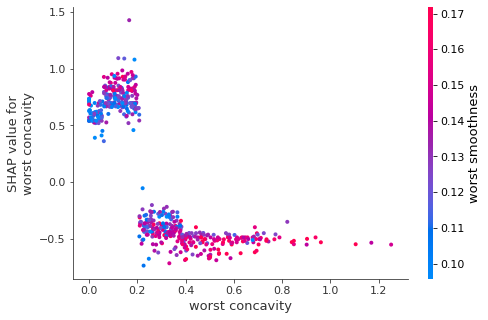

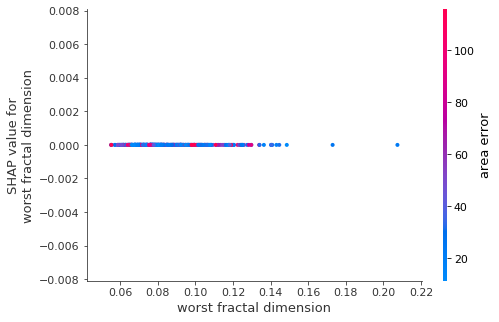

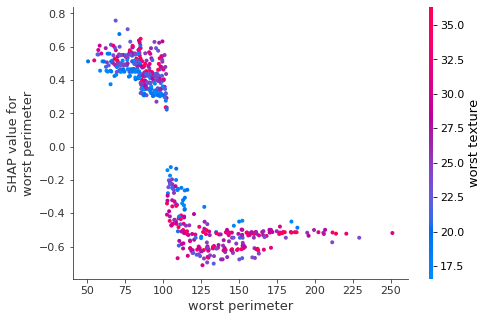

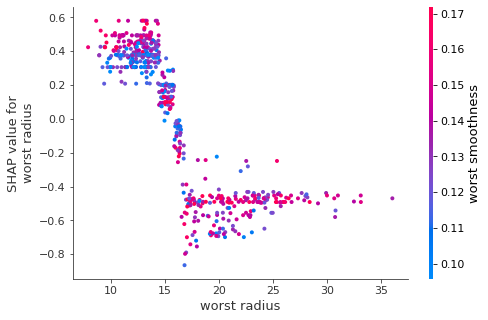

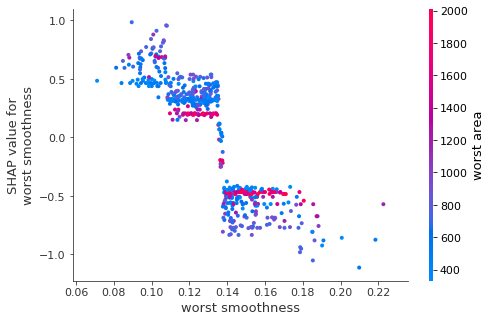

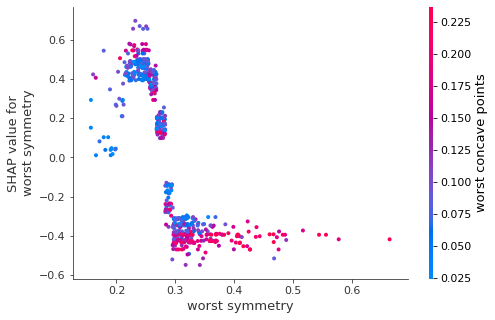

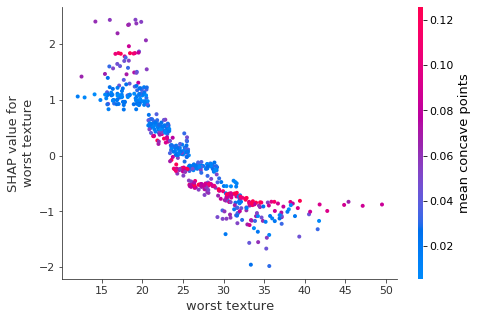

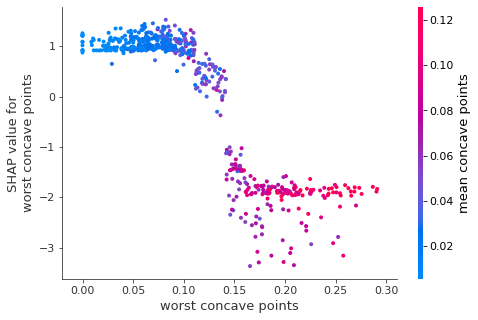

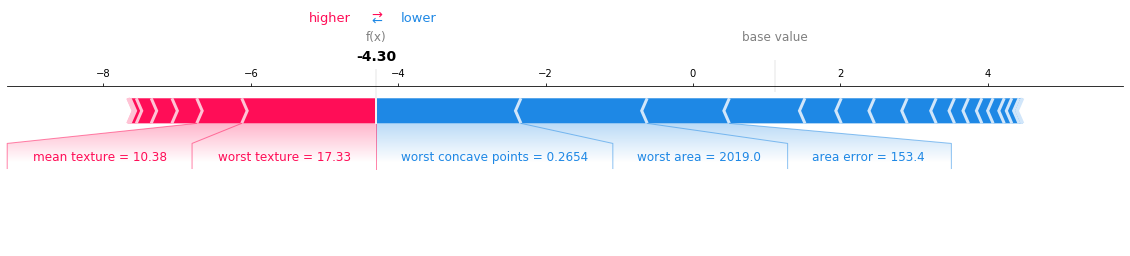

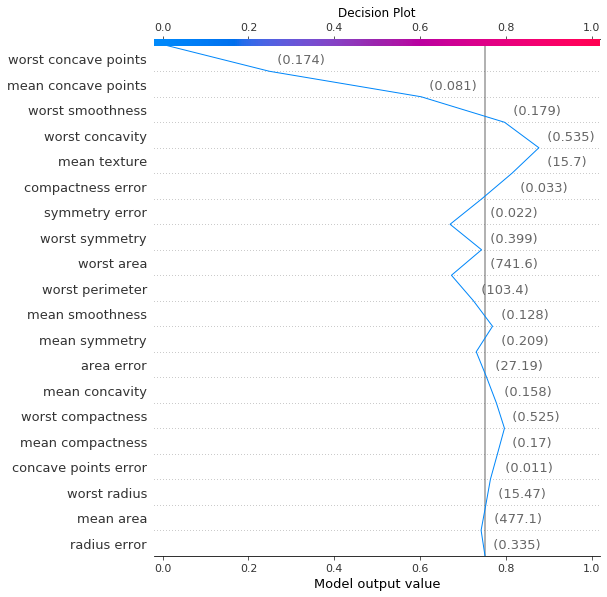

In [79]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  1 15:31:38 2022

@author: Arpan
"""

import shap



# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value


print(shap_values)



############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib =True)

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[5],link='logit' ,features=X.loc[5,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")


In [ ]:
import lime
import numpy as np
import lime.lime_tabular
import xgboost 

############## create explainer ###########
# we use the dataframes splits created above for SHAP
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(), feature_names=X_test.columns, class_names=['0','1'], verbose=True)

############## visX_np = X_test.to_numpy()ualizations #############
X_np = X_train.to_numpy()
exp = explainer.explain_instance(X_np[5], xgb_mod.predict_proba, num_features=20)
exp.show_in_notebook(show_table=True)
